# Explain social_p and social_r statistically



In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
# Import plotting routines
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

---

In [3]:
df_socprot = pd.read_csv('../git/resilience_indicator/df.csv', index_col='country')[['social_p', 'social_r']]

# Get data from csvs created using pull_data.ipynb

In [4]:
df_social_protection=pd.read_csv('output/df_social_protection.csv', index_col=0)
df_social_protection.head(1)

,social_p,social_p cont. lin. est. from ILO,social_p piecewise lin. est. from ILO,social_r,social_r cont. lin. est. from ILO,social_r piecewise lin. est. from ILO,Total public social protection expenditure and health expenditure (% GDP),Public health care (% GDP),Public social protection (% GDP),year,sanity
Afghanistan,NaN,0.067445,0.146767,NaN,0.043729,0.135389,5.6,3.61,1.99,2011.0,0


## Get social_p and social_r

In [5]:
df_social = df_social_protection.drop(['social_p cont. lin. est. from ILO', 'social_p cont. lin. est. from ILO', 
                                     'social_r cont. lin. est. from ILO', 'social_r piecewise lin. est. from ILO',
                                     'social_p piecewise lin. est. from ILO', 'sanity', 'Public health care (% GDP)'],
                                     axis=1)
#Rename for easier coding
df_social.rename(columns={'Total public social protection expenditure and health expenditure (% GDP)':'ILO_total',
                         'Public social protection (% GDP)':'ILO_social'}, inplace=True)
df_social.head(1)

,social_p,social_r,ILO_total,ILO_social,year
Afghanistan,NaN,NaN,5.6,1.99,2011.0


## Get Political Stability

In [6]:
PV  = pd.read_csv('Datasets/WGI Political Stability and Violence.csv',  encoding='utf-8', index_col=0)
PV.head(2)

,PV_EST,PV_PER_RNK,PV_PER_RNK_UPPER,PV_STD_ERR
country,,,,
Afghanistan,-2.458067,2.912621,5.797101,0.221863
Albania,0.473255,61.650486,75.362320,0.204799


## Get Government Effectiveness

In [7]:
GE  = pd.read_csv('Datasets/WGI Government Effectiveness.csv',  encoding='utf-8', index_col=0)
GE.head(2)

,GE_EST,GE_PER_RNK,GE_PER_RNK_UPPER,GE_STD_ERR
country,,,,
Afghanistan,-1.344121,8.173077,16.746412,0.231331
Albania,-0.070645,51.923077,63.636364,0.214527


## Get Regulatory Quality

In [8]:
RQ  = pd.read_csv('Datasets/WGI Regulatory Quality.csv',  encoding='utf-8', index_col=0)
RQ.head(2)

,RQ_EST,RQ_PER_RNK,RQ_PER_RNK_UPPER,RQ_STD_ERR
country,,,,
Afghanistan,-1.126951,11.538462,23.923445,0.191011
Albania,0.225227,60.576923,68.899521,0.179676


## Get Corruption Index from Transparency International

In [9]:
CPI = pd.read_csv('Datasets/CPI_2015.csv', index_col='country', encoding='utf-8')

## Get Remittances

In [10]:
rem = pd.read_csv('Datasets/WDI remittances.csv', index_col='country', encoding='utf-8')
rem.rename(columns={'BX.TRF.PWKR.DT.GD.ZS - pers. remittances received, % GDP':'remittance_gdp'}, inplace=True)
rem.rename(columns={'BX.TRF.PWKR.CD.DT - pers. remittances received, curr. US$':'remittance_usd'}, inplace=True)

## Get GDP

In [11]:
gdp = pd.read_csv('Datasets/GDP_pc_PPP.csv', index_col='country', encoding='utf-8')
gdp.rename(columns={'GDP per cap, PPP':'gdp'}, inplace=True)

## Get Country Income Categories

In [12]:
country_cat = pd.read_csv('Datasets/WB country_categories.csv', index_col='name', encoding='utf-8')['incomeLevel']

In [13]:
country_income_dict = {'Low income':'low','Lower middle income':'middle','Upper middle income':'middle',
                       'High income: nonOECD':'high', 'High income: OECD':'high'}

In [14]:
country_income = pd.DataFrame(country_cat)
country_income.replace(country_income_dict, inplace=True)
country_income.rename(columns={'incomeLevel':'income'}, inplace=True)
country_income

,income
name,
Aruba,high
Afghanistan,low
Africa,Aggregates
Angola,middle
Albania,middle
Andorra,high
Andean Region,Aggregates
Arab World,Aggregates
United Arab Emirates,high


## Get Gini Coefficient

In [15]:
gini = pd.read_csv('Datasets/WDI GINI.csv', index_col='country', encoding='utf-8')
gini.rename(columns={'SI.POV.GINI - Gini Index':'gini'}, inplace=True)

## Merge these datasets into a DataFrame df_stats

In [16]:
df_stats = pd.concat([df_social, PV, GE, RQ, CPI['CPI2015'], rem, gdp, country_cat, country_income, gini], axis=1)
df_stats.drop(['Africa','Arab World','Andean Region', 'Caribbean small states', 'Central Europe and the Baltics',
               'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)',
               'East Asia and the Pacific (IFC classification)', 'Euro area',
               'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)',
               'Europe and Central Asia (IFC classification)', 'European Union',
               'Turks and Caicos Islands',
               'Sub-Saharan Africa (IFC classification)', 'Sub-Saharan Africa (all income levels)',
               'Sub-Saharan Africa (developing only)', 'Sub-Saharan Africa excluding South Africa',
               'Sub-Saharan Africa excluding South Africa and Nigeria','Other small states',
               'Pacific island small states', 'Heavily indebted poor countries (HIPC)', 'High income',
               'High income: OECD', 'High income: nonOECD', 'Latin America & Caribbean (all income levels)',
               'Latin America & Caribbean (developing only)', 'Latin America and the Caribbean',
               'Latin America and the Caribbean (IFC classification)', 'Least developed countries: UN classification',
               'Middle East & North Africa (all income levels)',
               'Middle East & North Africa (developing only)','Middle East (developing only)',
               'Middle East and North Africa (IFC classification)', 'Middle East & North Africa (all income levels)',
               'Middle income', 'North Africa', 'North America', 'Not classified', 'OECD members',
               'Low & middle income', 'Low income', 'Lower middle income', 'Upper middle income','World'],
              axis=0, errors='ignore', inplace=True)

In [17]:
df_stats.head(2)

,social_p,social_r,ILO_total,ILO_social,year,PV_EST,PV_PER_RNK,PV_PER_RNK_UPPER,PV_STD_ERR,GE_EST,...,RQ_PER_RNK,RQ_PER_RNK_UPPER,RQ_STD_ERR,CPI2015,remittance_usd,remittance_gdp,gdp,incomeLevel,income,gini
Afghanistan,NaN,NaN,5.60,1.99,2011.0,-2.458067,2.912621,5.797101,0.221863,-1.344121,...,11.538462,23.923445,0.191011,11.0,2.680607e+08,1.337748,6.113255e+10,Low income,low,NaN
Albania,0.26295,0.17936,10.83,8.15,2011.0,0.473255,61.650486,75.362320,0.204799,-0.070645,...,60.576923,68.899521,0.179676,36.0,1.141665e+09,8.641441,3.215174e+10,Upper middle income,middle,28.96


In [18]:
income_level_to_color = {'Low income':'red','Lower middle income':'orange','Upper middle income':'yellow',
                       'High income: nonOECD':'green', 'High income: OECD':'blue'}
income_level_to_color

{'High income: OECD': 'blue',
 'High income: nonOECD': 'green',
 'Low income': 'red',
 'Lower middle income': 'orange',
 'Upper middle income': 'yellow'}

In [19]:
income_colors=pd.DataFrame(df_stats['incomeLevel'])
income_colors.replace(income_level_to_color, inplace=True)

# Perform statistical Analyses

In [20]:
regress_multiple_p = smf.ols(formula='social_p ~ ILO_social + GE_EST', data=df_stats).fit()
regress_multiple_p.params
regress_multiple_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     40.84
Date:                Mon, 09 May 2016   Prob (F-statistic):           3.39e-13
Time:                        12:29:28   Log-Likelihood:                 27.734
No. Observations:                  89   AIC:                            -49.47
Df Residuals:                      86   BIC:                            -42.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2288      0.038      6.092      0.000         0.154     0.304
ILO_social     0.0128      0.004      3.163      0.002         0.005     0.021
GE_EST         0.1070      0.031      3.490      0.001         0.046     0.168
==============================================================================
Omnibus:                       27.822   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.161
Skew:                           1.378   Prob(JB):                     6.99e-10
Kurtosis:                       4.942   Cond. No.                         24.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

((0, 1.2000000000000002),
 (-2.0, 2.5),
 <matplotlib.legend.Legend at 0x1147abcf8>)

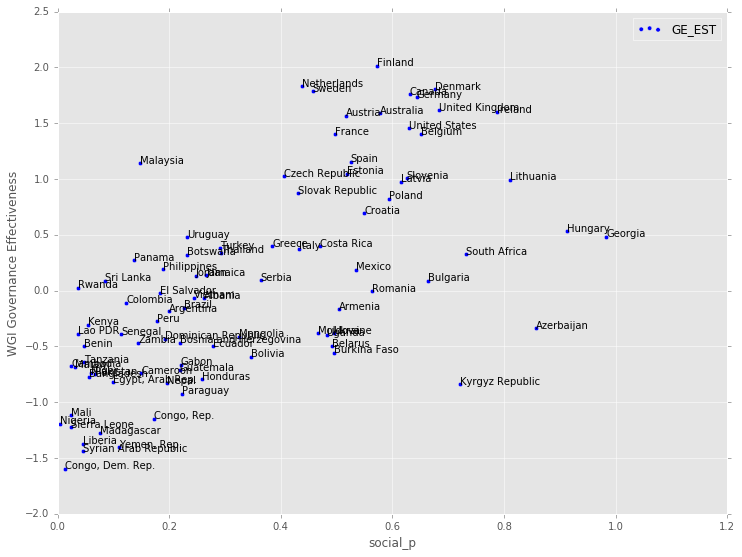

In [21]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['GE_EST'], clip_on=False)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'GE_EST']],
                 s=k, xycoords='data')
plt.xlabel('social_p'), plt.ylabel('WGI Governance Effectiveness')
plt.xlim(0), plt.ylim(), plt.legend()

((0, 1.2000000000000002), (0, 25.0), <matplotlib.legend.Legend at 0x118fbb9b0>)

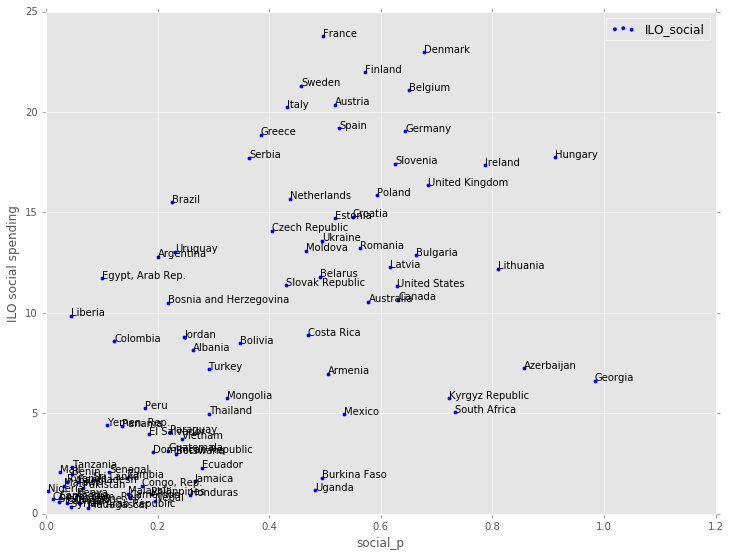

In [31]:
fig = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['ILO_social'], clip_on=False)
for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'ILO_social']],
                 s=k, xycoords='data')
plt.xlabel('social_p'), plt.ylabel('ILO social spending')
plt.xlim(0), plt.ylim(0), plt.legend()

In [22]:
regress_multiple_p = smf.ols(formula='social_p ~ ILO_social+ ILO_social:CPI2015 + incomeLevel', data=df_stats).fit()
regress_multiple_p.params
regress_multiple_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     10.18
Date:                Mon, 09 May 2016   Prob (F-statistic):           3.66e-08
Time:                        12:29:29   Log-Likelihood:                 23.605
No. Observations:                  80   AIC:                            -33.21
Df Residuals:                      73   BIC:                            -16.54
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1910      0.048      3.995      0.000         0.096     0.286
incomeLevel[T.High income: OECD]        0.1276      0.086      1.476      0.144        -0.045     0.300
incomeLevel[T.High income: nonOECD]     0.1042      0.079      1.321      0.191        -0.053     0.261
incomeLevel[T.Low income]              -0.0964      0.058     -1.665      0.100        -0.212     0.019
incomeLevel[T.Lower middle income]      0.0048      0.048      0.100      0.921        -0.091     0.101
incomeLevel[T.Upper middle income]      0.0508      0.041      1.252      0.214        -0.030     0.132
ILO_social                              0.0142      0.008      1.687      0.096        -0.003     0.031
ILO_social:CPI2015                   1.831e-06      0.000      0.014      0.989        -0.000     0.000
==============================================================================
Omnibus:                       26.225   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.440
Skew:                           1.358   Prob(JB):                     1.65e-09
Kurtosis:                       5.181   Cond. No.                     1.20e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.98e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [23]:
regress_multiple_p = smf.ols(formula='social_p ~ ILO_social + gini', data=df_stats).fit()
regress_multiple_p.params
regress_multiple_p.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_p   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     30.88
Date:                Mon, 09 May 2016   Prob (F-statistic):           7.80e-11
Time:                        12:29:30   Log-Likelihood:                 22.106
No. Observations:                  89   AIC:                            -38.21
Df Residuals:                      86   BIC:                            -30.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2322      0.118      1.970      0.052        -0.002     0.467
ILO_social     0.0220      0.003      6.476      0.000         0.015     0.029
gini          -0.0019      0.003     -0.721      0.473        -0.007     0.003
==============================================================================
Omnibus:                       20.288   Durbin-Watson:                   2.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.948
Skew:                           1.117   Prob(JB):                     2.32e-06
Kurtosis:                       4.416   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
regress_multiple_r = smf.ols(formula='social_r ~ ILO_social + remittance_gdp + CPI2015', data=df_stats).fit()
regress_multiple_r.params
regress_multiple_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               social_r   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     28.86
Date:                Mon, 09 May 2016   Prob (F-statistic):           1.47e-12
Time:                        12:29:30   Log-Likelihood:                 71.815
No. Observations:                  80   AIC:                            -135.6
Df Residuals:                      76   BIC:                            -126.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0953      0.037      2.596      0.011         0.022     0.168
ILO_social         0.0162      0.002      6.992      0.000         0.012     0.021
remittance_gdp     0.0030      0.002      1.528      0.131        -0.001     0.007
CPI2015           -0.0004      0.001     -0.456      0.650        -0.002     0.001
==============================================================================
Omnibus:                       20.861   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.512
Skew:                           1.149   Prob(JB):                     6.44e-07
Kurtosis:                       4.809   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Graphical Output

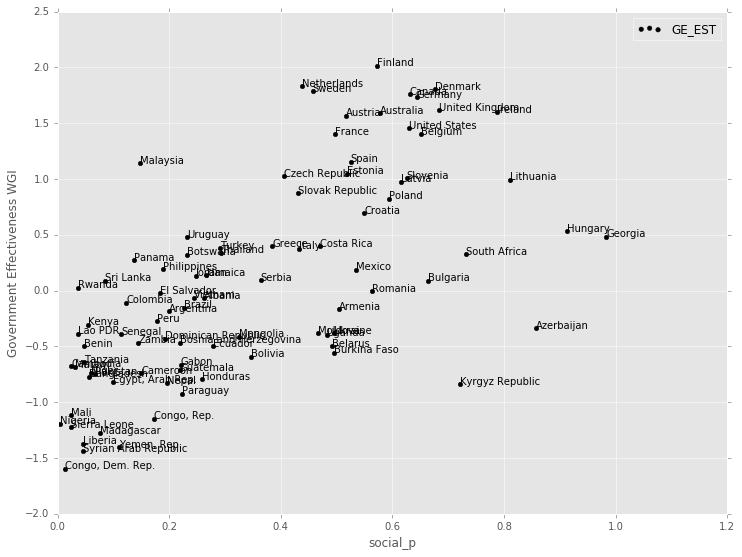

In [25]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['GE_EST'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'GE_EST']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('social_p')
plt.ylabel('Government Effectiveness WGI')
plt.xlim(0)
plt.legend()

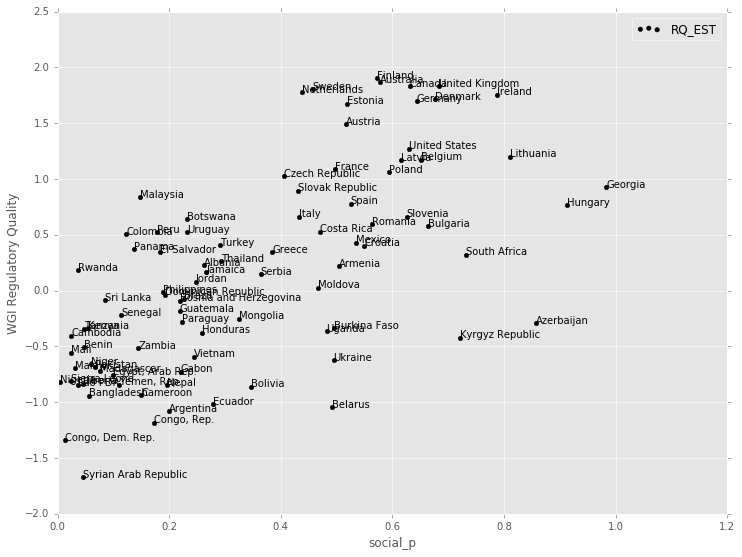

In [26]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['RQ_EST'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'RQ_EST']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('social_p')
plt.ylabel('WGI Regulatory Quality')
plt.xlim(0)
plt.legend()

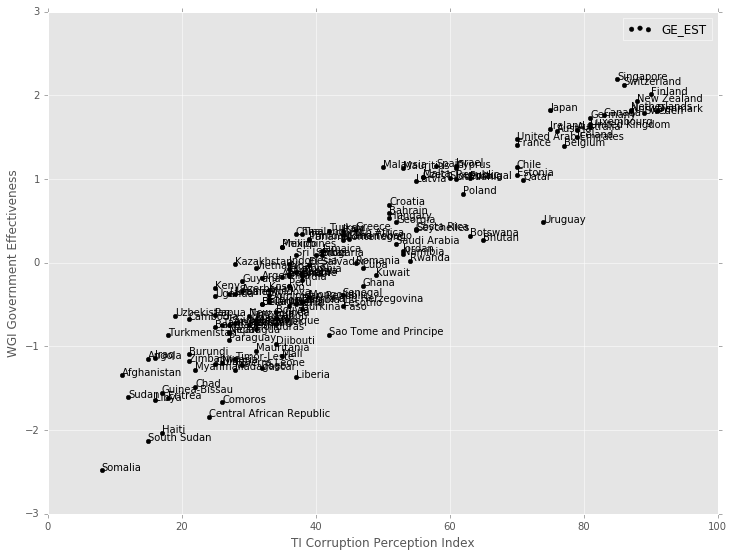

In [27]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['CPI2015'], df_stats['GE_EST'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'CPI2015'], df_stats.loc[k,'GE_EST']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('TI Corruption Perception Index')
plt.ylabel('WGI Government Effectiveness')
plt.xlim(0)
plt.legend()

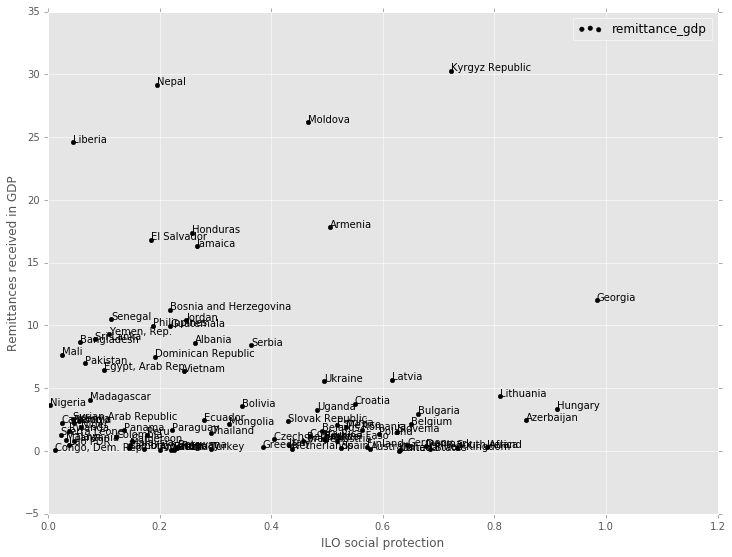

In [28]:
fig1 = plt.figure(figsize=[12,9])
plt.scatter(df_stats['social_p'], df_stats['remittance_gdp'], color='k', clip_on=False)

for k in df_stats.index.values:
    plt.annotate(xy = [df_stats.loc[k,'social_p'], df_stats.loc[k,'remittance_gdp']],
                 s=k, xycoords='data')

#plt.plot(ILO_data.loc[country_diff]['Public social protection (% GDP)'],
#         df_socprot_missing['social_p cont. lin. est. from ILO'], 'kx', mew=2, ms=10)

#plt.plot(x_grid, y_hat_lin_p, label="Linear", color = 'k', ls = '-', linewidth=2)
#plt.plot(x_grid, y_hat_plin_p, label="Piecewise linear", color = 'g', ls = '-', linewidth=2)
#plt.plot(x_grid, k0_p(x_grid), label="Nonparam., locally linear", color = 'blue', ls = '--', linewidth=2)


plt.xlabel('ILO social protection')
plt.ylabel('Remittances received in GDP')
plt.xlim(0)
plt.legend()